In [ ]:
import os
from fingerprinter import MolCLRFingerprinter
from fingerprinter import MoleBERTFingerprinter

fingerprinter = MoleBERTFingerprinter('mean')

In [10]:
from datasets.fishtox import FishTox

dataset = FishTox('/data')

In [11]:
z = fingerprinter(dataset.smiles)

In [12]:
targets = dataset.y

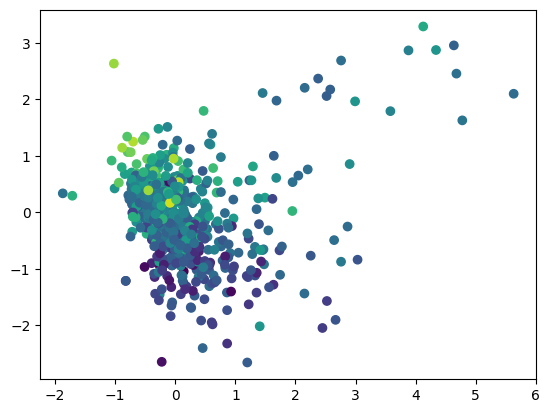

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

valid_z = (z!=z).sum(-1) == 0

proj = PCA(2)
plt.scatter(*proj.fit_transform(z[valid_z]).T, c=targets[valid_z,0])

In [8]:
fingerprinter.model.pool

GlobalAttention(gate_nn=Linear(in_features=300, out_features=1, bias=True), nn=None)

In [1]:
import sys
import os
os.chdir('..')
sys.path.insert(0, "Mole-BERT")
%load_ext autoreload
%autoreload 2

In [3]:
from model import GNN_graphpred

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io

In [27]:

# sum, mean, max, attention, set2set
model = GNN_graphpred(
    num_layer=5, 
    emb_dim=300, 
    num_tasks=1, 
    graph_pooling = 'mean', 
    gnn_type='gin'
)

model.from_pretrained('Mole-BERT/model_gin/Mole-BERT.pth')

In [18]:
from loader import mol_to_graph_data_obj_simple
from rdkit.Chem import AllChem

In [19]:
mol = AllChem.MolFromSmiles(dataset.smiles[0])
graph = mol_to_graph_data_obj_simple(mol)

In [21]:
fingerprint = model(graph)[1]

In [25]:
model.pool(fingerprint, graph.batch).shape

torch.Size([1, 300])